In [145]:
import pandas as pd
import scipy.stats
import numpy as np
import wquantiles
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
state = pd.read_csv('../제공자료/data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


평균, 중앙값, 절사평균

평균이 절사평균보다 크고, 절사평균은 중앙값보다 크다

평균 > 절사평균 > 중앙값

In [147]:
print('평균 : ',state['Population'].mean())
print('절사평균 : ',scipy.stats.trim_mean(state['Population'],0.1))
print('중앙값 : ',state['Population'].median())

평균 :  6162876.3
절사평균 :  4783697.125
중앙값 :  4436369.5


가중평균, 가중 중앙값

가중평균과 가중 중앙값을 거의 비슷하다 

In [148]:
print('가중평균 : ',np.average(state['Murder.Rate'],weights=state['Population']))
print('가중 중앙값 : ',wquantiles.median(state['Murder.Rate'],weights=state['Population']))

가중평균 :  4.445833981123393
가중 중앙값 :  4.4


### 주요 개념
- 가장 기본적인 위치 추정 기법은 평균이다. 하지만 극단값(특잇값)에 민감할 수 있다.
- 중앙값, 절사평균과 같은 다른 방법들이 특잇값이나 이상 데이터에 덜 민감하므로 좀 더 로버스트하다.
> 로버스트 : 극단값에 민감하지 않다.

## 변이 추정
- 변이는 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도를 나타낸다.

In [149]:
import statsmodels.robust


print('표준편차 :',state['Population'].std())
print('분위수 :',state['Population'].quantile(0.75)-state['Population'].quantile(0.25))
print('평균절대편차 :',statsmodels.robust.scale.mad(state['Population']))

표준편차 : 6848235.347401144
분위수 : 4847308.0
평균절대편차 : 3849876.1459979336


In [150]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

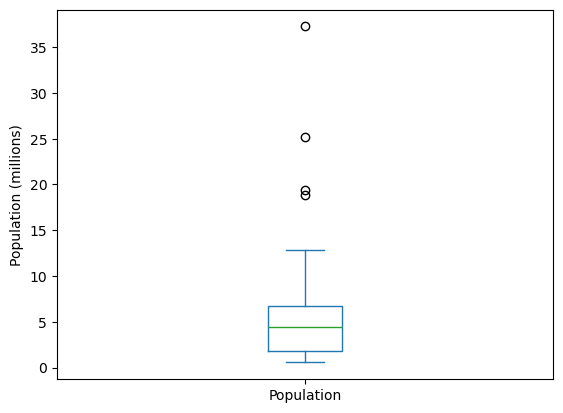

In [151]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [152]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

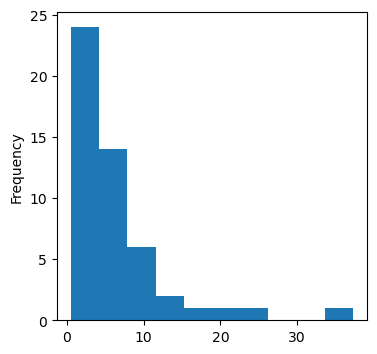

In [153]:
ax = (state['Population']/ 1_000_000).plot.hist(figsize=(4,4))


Text(0.5, 0, 'Murder Rate (per 100,000)')

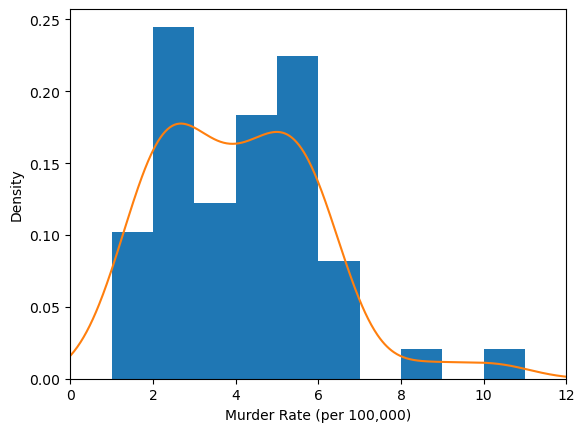

In [154]:
ax = state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [155]:
# 댈러스-포트워스 항공(DFW)에서 발생하는 항공기 지연의 원인과 그 횟수
dfw = pd.read_csv('../제공자료/data/dfw_airline.csv')
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

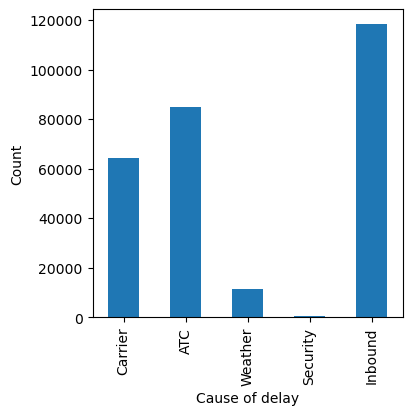

In [156]:
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

### 통신사

### S&P 500

In [157]:
sp500_px = pd.read_csv('../제공자료/data/sp500_data.csv',index_col=0)
sp500_sym = pd.read_csv('../제공자료/data/sp500_sectors.csv')

In [158]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

<Axes: >

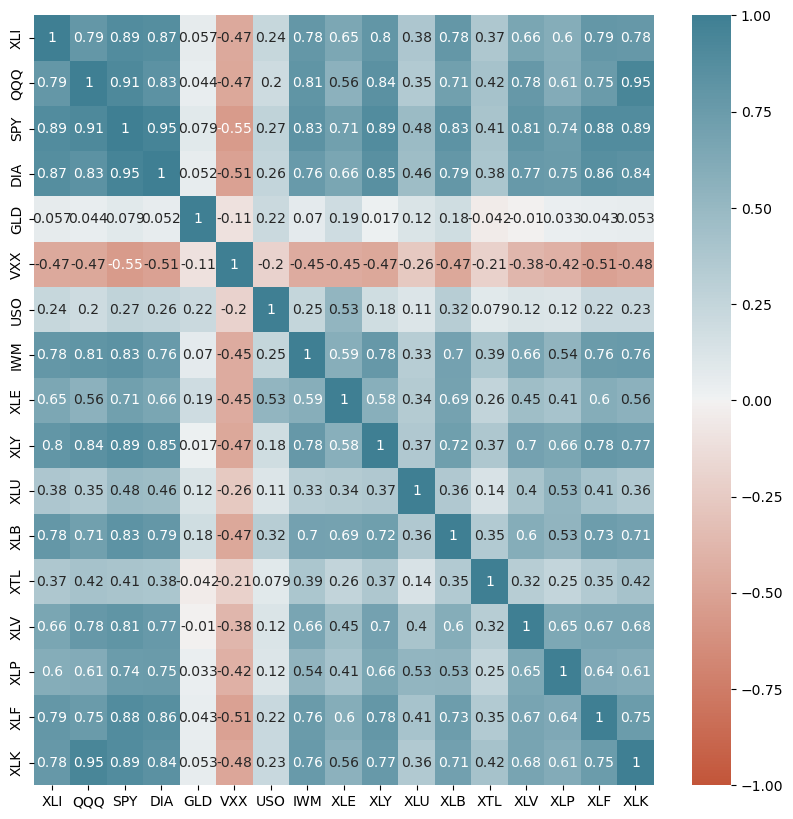

In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(etfs.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True),annot=True)

In [160]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


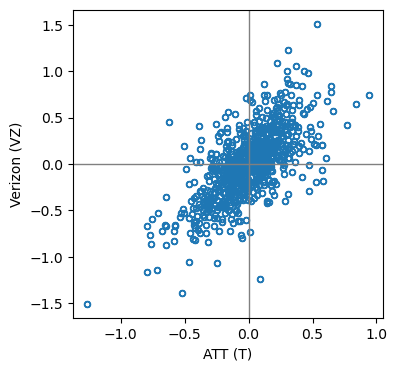

In [161]:
ax = telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0,color='grey',lw=1)
ax.axvline(0,color='grey',lw=1)

### 집의 크기와 과제 평가 금액의 상관관계 파악

In [162]:
kc_tax = pd.read_csv('../제공자료/data/kc_tax.csv.gz')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [163]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


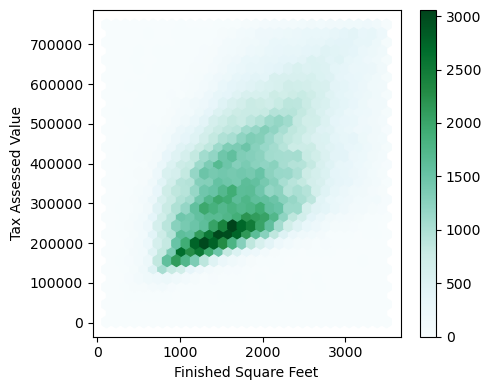

In [164]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

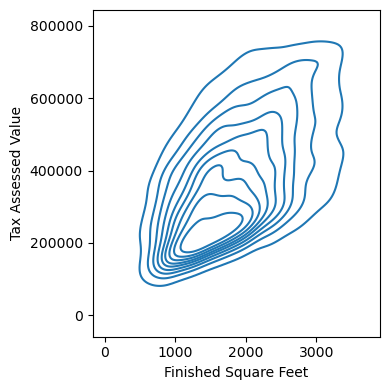

In [165]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### 분할표

In [166]:
lc_loans = pd.read_csv('../제공자료/data/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [167]:
crosstab = lc_loans.pivot_table(index='grade',columns='status',aggfunc=lambda x : len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [168]:
df = crosstab.loc['A':'G',:].copy()
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [169]:
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
df

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_30785/594312980.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_30785/594312980.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_30785/594312980.py:1: FutureWarn

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,72490
B,0.040054,0.709013,0.235401,0.015532,132370
C,0.049828,0.735702,0.191495,0.022974,120875
D,0.067410,0.717328,0.184189,0.031073,74277
E,0.081657,0.707936,0.170929,0.039478,34804
F,0.118258,0.654371,0.180409,0.046962,12904
G,0.126196,0.614008,0.198396,0.061401,3241


In [170]:
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [171]:
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### 항공사별 비행 지연 정도 비교
- pct_carrier_delay : 항공사 자체 지연
- pct_atc_delay : 항공 교통 관제 지연(Air Traffic Control)
- pct_weather_delay : 날씨로 인한 지연
- airline : 항공사

In [172]:
airline_stats = pd.read_csv('../제공자료/data/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


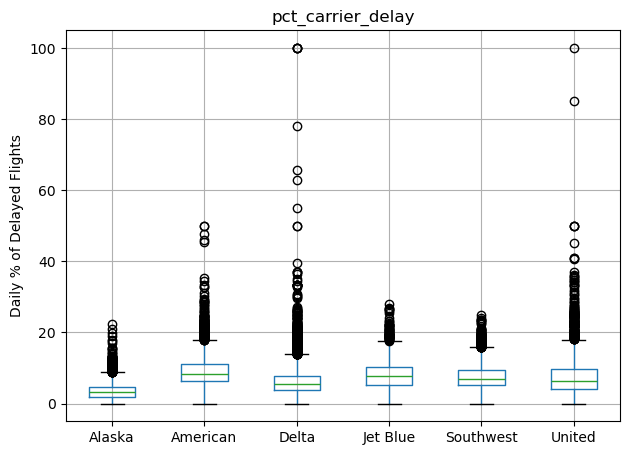

In [173]:
ax = airline_stats.boxplot(by='airline',column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')
plt.tight_layout()
plt.show()

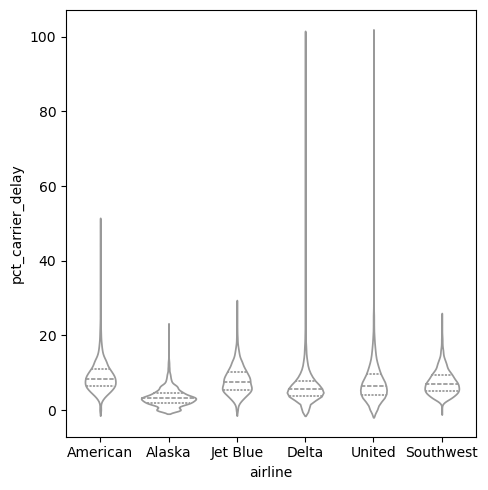

In [175]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
plt.tight_layout()
plt.show()

### 우편번호별 데이터를 묶어서 도식화

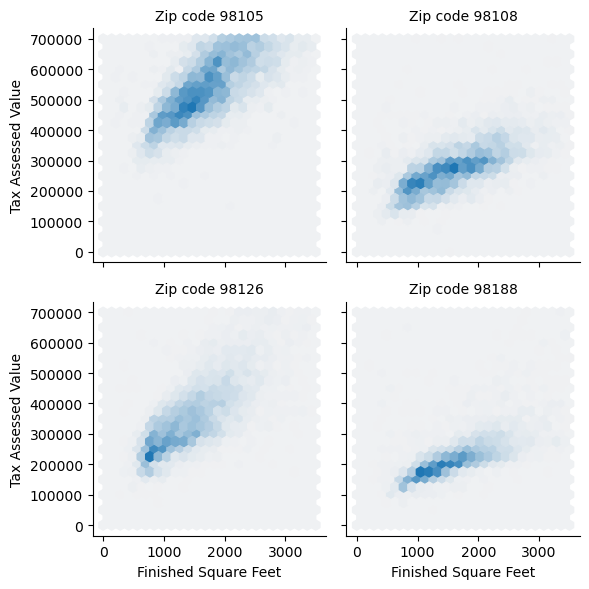

In [178]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()